# Bellman Equation

Consider a LP who provide $L>0$ liquidity with the price range $[P_a, P_b]$ a Uniswap V3 pool trading $X$ and $Y$ assets
with fee constant $\gamma$. Suppose there's also a reference market trading the same asset. The market price denoted by 
$\{S_n\}_{n \geqslant 0}$  ($Y$ w.r.t $X$) follows geometric simple random walk with forward probability $p > 0$ and some step 
size $\delta > 0$. And the pool price $\{S^*_n\}_{n \geqslant 0}$ is driven by the arbitrage between market and pool. In the 
presence of fee, $S^*_n \in [\gamma S_n, \gamma^{-1} S_n]$. Let $M_n = \ln S_n - \ln S^*_n$ and choose $\delta = - \frac{1}{k} \ln \gamma$, we have 
$$M_n \in [\ln \gamma, \ln \gamma^{-1}] = \{ -k \delta, \cdots, k \delta\}$$ 
The pair $(\ln S^*_n, M_n)$ is a Markov chain which can help us the computation in the later part.


Our goal is to numerically compute the expected reward of LP's position stopped when the pool price reach some levels $P_l$ and $P_u$, i.e compute the value function (expected discounted reward)

$$
V(B, M) = 
\mathbb{E}_{( B, M) }\Bigg\{ 
\sum_{n=0}^{T-1} e^{-rn} [\underbrace{f_X( B_{n+1}, B_n)}_{\text{fee paid in X asset}} + \overbrace{ 
e^{ B_{n+1}\,+\, M_{n+1}\,\delta} f_Y( B_{n+1}, B_n) }^{\text{fee paid in Y asset (market price )}} ] + \underbrace{e^{-rT}W_T}_{\text{terminal wealth}}
\Bigg\}
$$

where 
- $B_n = \ln S^*_n$ logarithm of the pool price. 
- $ T = \inf \{ n \geqslant 0 \mid B_n = \ln P_l \, \text{or} \, \ln P_u \}$. 
- $W_n = X_n + S_n \cdot Y_n$ wealth of the LP at time $n$ (marke-to-market).
- $f_X(B_{n+1}, B_n) = L\,\frac{1-\gamma}{\gamma}\big((P_b \wedge e^{B_{n+1}})^\frac{1}{2}\,-\,(P_a \vee e^{B_n })^\frac{1}{2}\big)\,I_{\{ B_{n+1} \,>\, B_n \}\,\cap\,\{ B_n \, \leqslant \, \ln P_b\}} $
- $f_Y(B_{n+1}, B_n) = L\,\frac{1-\gamma}{\gamma} \big((P_a \vee e^{B_{n+1}})^{-\frac{1}{2}} \, - \, 
(P_b \wedge e^{B_n})^{-\frac{1}{2}}\big)\,I_{\{ B_{n+1} \,>\, B_n \}\,\cap\,\{ B_n\,\leqslant\,\ln P_b\}} $

We define another stopping time $\tau \equiv \{ n \geqslant 0 \mid B_n = B_0 \pm \delta \}$, i.e the first time the pool price moves. Then the above can be rewritten as

\begin{multline}
V(B, M) = \mathbb{E}_{(B, M)} \big[e^{-r \tau}\,|\, B_\tau = B_0 + \delta\big]\big( V(B +\delta, k) + f_X(B +\delta, B) \big) +
\mathbb{E}_{(B, M)} \big[e^{-r \tau} \,|\, B_\tau = B_0 - \delta\big]\big( V(B -\delta, -k) + e^{B-(k+1)\delta}f_Y(B-\delta, B) \big)
\end{multline}

Let $N \in \mathbb{N} $ s.t $\ln P_u  - \ln P_l = (N+1)\delta $. 
We enumerate the states with $M_n = \pm k \cdot \delta $( one can refer to the  digram  in the next cell ). For these states, the above can be further rewritten as

$$
V(n) = \begin{cases}
A_u(n) \big[ V(n+N+1) + f_X(n) \big] + A_d(n) \big[  V(n-1) + S(n-1) f_Y(n) \big] 
& \text{if} \, 0< n \leqslant N 
\\
A_u(n) \big[ V(n+1) + f_X(n) \big] + A_d(n) \big[  V(n-N) + S(n-N-1) f_Y(n) \big]
& \text{if} \, N+1 \leqslant n < 2N+1 
\end{cases}
$$

where 
* For $ 0 \leqslant n \leqslant 2N+1 $, state $n$ corresponding to
$$
\begin{cases}
( P_l e^{n \delta}, -k )& \text{if} \, 0 \leqslant n \leqslant N \\
( P_l e^{n-(N+1) \delta}, k) & \text{if} \, N+1 \leqslant n \leqslant 2N+1 \\
\end{cases}
$$
* $A_u(n)$ corresponds to $\mathbb{E}_{(B, M)} \big[ e^{-r \tau} \,; \,  B_\tau =  B_0 + \delta \big] $ 
* $A_d(n)$ corresponds to $\mathbb{E}_{(B, M)} \big[ e^{-r \tau} \,; \,  B_\tau =   B_0 - \delta \big] $
* $S(n)$ corresponds to $ e^{ B+ M \delta}$
* $f_X(n)$ corresponds to $f_X(B+\delta, B)$
* $f_Y(n)$ corresponds to $f_Y(B-\delta, B)$

We can also write it in the matrix form ($0 <n_1 \leqslant N$, $N+1 \leqslant n_2 < 2N+1$):

$$
\scriptsize\begin{pmatrix}
V(0) \\
\vdots \\
V(n_1) \\
\vdots \\
V(n_2) \\
\vdots \\
V(2N+1)
\end{pmatrix}
=
\begin{pmatrix}
1      &    0    & \ldots &   0   &  \ldots&   0    & 0 \\
\vdots \\
  0    & \ldots  &  \overbrace{A_d(n_1)}^{n_1-1\, \text{th column}} & \ldots & 
  \overbrace{A_u(n_1)}^{n_1  +N+1 \,\text{th column} } & \ldots & 0 \\ 
\vdots \\
  0    & \ldots  &  \ldots &  \overbrace{A_d(n_2)}^{n_2-N\, \text{th column}} &
 \ldots &  \overbrace{A_u(n_2)}^{n_2+1 \,\text{th column} } &  0 \\ 
\vdots \\
  0    &    0    &  0    &   0    &  0  &   0     &  1 
\end{pmatrix}
\begin{pmatrix}
V(0) \\
\vdots \\
V(n_1) \\
\vdots \\
V(n_2) \\
\vdots \\
V(2N+1)
\end{pmatrix}
+
\begin{pmatrix}
0\\
\vdots \\
A_u(n_1)  f_X(n_1) + A_d(n_1) S(n_1-1) f_Y(n_1) \\
\vdots \\
A_u(n_2)  f_X(n_2) + A_d(n_2) S(n_2-N-1) f_Y(n_2) \\
\vdots \\
0
\end{pmatrix}
\qquad (*)
$$

with boundary conditions

$$
\begin{align*}
V(2N+1) 
&= W_u 
\equiv L( \sqrt{ (P_b \wedge P_u) \vee P_a } - \sqrt{P_a} ) + 
L P_u e^{k\delta}( \frac{1}{ \sqrt{ (P_b \wedge P_u) \vee P_a } }     - \frac{1}{\sqrt{P_b}}  )
\\
V(0) 
&=W_l 
\equiv L( \sqrt{ (P_b \wedge P_l) \vee P_a } - \sqrt{P_a} ) + 
L P_l e^{-k\delta}( \frac{1}{ \sqrt{ (P_b \wedge P_l) \vee P_a } }     - \frac{1}{\sqrt{P_b}}  )
\end{align*}
$$

After knowing the value of $V$ on the indexed states, we can derive the intermediate states by the previous equation. 

In [ ]:
# illustration of enumeration
#                                                            ●    (Pu,k) --> 2*N+1
#                                                            ｜
#               N <-- (Pl*exp(N*delta),-k)  ● -------------- ●    (Pl*exp(N*delta),k) --> 2*N
#                                           ｜               ｜
#                                           ● -------------- ●    (Pl*exp((N-1)*delta),k) --> 2*N-1
#                                           ｜               ｜
#                                           ● -------------- ●
#                                           ｜               ｜
#                                           ● -------------- ●
#                                           ｜               ｜
#                                           ● -------------- ●
#                                           ｜               ｜
#               2 <-- (Pl*exp(2*delta),-k)  ● -------------- ●
#                                           ｜               ｜
#               1 <-- (Pl*exp(delta), -k)  ● -------------- ●     (Pl*exp(delta),k) --> N+1
#                                           ｜
#               0 <-- (Pl,-k)               ●

## Computation of $\scriptsize \mathbb{E}_{(B, M)} (e^{-r \tau} \,; \, B_\tau = B_0 - \delta)$ and $\scriptsize \mathbb{E}_{(B, M)}(e^{-r \tau} \,; \, B_\tau = B_0 + \delta)$

### Formula check
For this part, we compute
$\mathbb{E}_{(B,M)}(e^{-r\tau} \,; \, B_\tau = B_0 +\delta) $
and $\mathbb{E}_{(B,M)}(e^{-r\tau} \,; \, B_\tau = B_0 -\delta )$ 
or equivalently let $\{ X_n\}_{n \geqslant 0}$ be a SRW with forward probability $p>0 $ and compute
$ \mathbb{E}_{x}(e^{-r\tau} \,; \, X_\tau =  k+1)$ and $ \mathbb{E}_{x}(e^{-r\tau} \,; \, X_\tau =-(k+1))$  with 
$\tau = \{ n \geqslant 0 \mid X_n = k+1 \, \text{or} \, -(k+1) \}$ and $x \notin \{ -(k+1), (k+1)\}$. We can choose $a>0$ s.t $\{ e^{aX_n \, - \, r \tau} \}_{n \geqslant 0}$ is a martingale w.r.t
$ \{ \mathcal{F}_n \}_{n \geqslant 0} \equiv \{ \sigma(X_k \,; \, k \leqslant n) \}_{ n \geqslant 0}$. By some computation we get two solutions:
$$
a_\pm = \log\Bigg(\frac{e^r \pm \sqrt{e^{2r} -4p(1-p) }}{2p}\Bigg)  \qquad (1)
$$ 

Using the property of martingale, we can solve the linear equations :

$$
\begin{align*}
 \mathbb{E}_{x}( e^{a_\pm X_0}) = e^{a_\pm x} = \mathbb{E}_{x}( e^{a_\pm X_\tau \, - \, r \tau}) 
 &=  \mathbb{E}_{x}( e^{a_\pm X_\tau \, - \, r \tau}  \,; \, X_\tau = k+1) 
 +\mathbb{E}_{x}( e^{a_\pm X_\tau \, - \, r \tau}  \,; \, X_\tau = -k-1) 
 \\
 & =
  e^{(k+1)a_\pm } \, \mathbb{E}_{x}( e^{ - \, r \tau}  \,; \, X_\tau = k+1) 
+ e^{ -(k+1)a_\pm } \, \mathbb{E}_{x}( e^{ - \, r \tau}  \,; \, X_\tau = -k-1) 
\end{align*}
$$

and derive the desired quantity (back to the original notation):

\begin{align*}
\mathbb{E}_{(B,M)} \big(e^{-r\tau} \,; \, B_\tau = B_0 +\delta \big)
=
\frac{  e^{a_+(M+k+1)} - e^{a_-(M+k+1)}  }{ e^{2a_+(k+1) } - e^{2a_-(k+1)}   }  
\quad (2) \\
\mathbb{E}_{(B,M)} \big(e^{-r\tau} \,; \, B_\tau = B_0 -\delta \big)
=
\frac{  e^{a_+(M-k-1)} - e^{a_-(M-k-1)}  }{ e^{-2a_+(k+1) } - e^{-2a_-(k+1)}   }
\quad (3)
\end{align*}

Note that if $p = \frac{1}{2}$ and $ r = 0 $, we will get a 
degenerate root but it's not a big problem since $\{X_n\}_{n \geqslant 0}$ is a martingale and we have:
$$
\begin{align*}
\mathbb{E}_{(B,M)} \big(e^{-r\tau} \,; \, B_\tau = B_0 + \delta \big)
&=
P_M(X_\tau = k+1) = \frac{ M + k + 1}{2(k+1)} 
\quad (2^\star) 
\\
\mathbb{E}_{(B,M)} \big(e^{-r\tau} \,; \, B_\tau = B_0 -\delta \big)
&=
P_M(X_\tau = -k-1) = \frac{  k + 1 - M }{2(k+1)}
\,\, (3^\star)
\end{align*}
$$
The following part is just verification of the computation of the formula by sympy and can be skipped. 

In [ ]:
import sympy as sym

# check martingale computation
k = sym.symbols("k")
X = sym.symbols("X")
r = sym.symbols("r")
p = sym.symbols("p")
a = sym.symbols("a")
a_p = sym.log((sym.exp(r) + sym.sqrt(sym.exp(2 * r) - 4 * p * (1 - p))) / (2 * p))
a_m = sym.log((sym.exp(r) - sym.sqrt(sym.exp(2 * r) - 4 * p * (1 - p))) / (2 * p))
L = sym.exp(-r) * (p * sym.exp(a * (X + 1) - r * k) + (1 - p) * sym.exp(a * (X - 1) - r * k))
R = sym.exp(a * X - r * k)
# result = Conditional - Exact

In [ ]:
sym.simplify(L.subs(a, a_p) / R.subs(a, a_p)) - 1, sym.simplify(L.subs(a, a_m) / R.subs(a, a_m)) - 1

In [ ]:
x = sym.symbols("x")
theta = sym.exp(a * x)
theta_p = theta.subs(a, a_p)
theta_m = theta.subs(a, a_m)
A_u = (theta_p.subs(x, x + k + 1) - theta_m.subs(x, x + k + 1)) / (theta_p.subs(x, 2 * (k + 1)) - theta_m.subs(x, 2 * (k + 1)))
A_d = (theta_p.subs(x, x - k - 1) - theta_m.subs(x, x - k - 1)) / (theta_p.subs(x, -2 * k - 2) - theta_m.subs(x, -2 * k - 2))

In [ ]:
sym.simplify(A_u * theta_p.subs(x, k + 1) + A_d * theta_p.subs(x, -k - 1) - theta_p)

In [ ]:
sym.simplify(A_u * theta_m.subs(x, k + 1) + A_d * theta_m.subs(x, -k - 1) - theta_m)

$$
A = \frac{ e^{a_+( x+k+1 )} - e^{a_-( x+k+1 )} }{ e^{a_+( 2k+2 )} -  e^{a_-( 2k+2 )}}
\qquad
B = \frac{ e^{a_+( x-k-1 )} - e^{a_-( x-k-1 )} }{ e^{a_+( -2k-2 )} -  e^{a_-( -2k-2 )}}
$$

## Numerical computation
In the following, we use numpy to solve the linear equations above numerically.  

### index-to-state
This part computes the state of the Markov chain for a given index.

Parameters : 
* ```n``` : index of the state
* ```N``` : specify the number of states $2N+1$. By definition $ (N+1) \delta=  \ln P_u - \ln P_l $.
* ```k``` : specify the no-arbitrage region $[-k,k]$ (also the state space of $M$).
* ```gamma``` : fee constant in $ (0,1) $. 
* ```ln_Pl``` : logarithm of lower boundary price (normalized by $\delta$), so it is integer-valued. 

Functions :
* ```state_pool``` : returns  the pool price of given index 
* ``` state_M ``` : returns the value of $M$ ($k$ or $-k$) of given index.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy as sci
import datetime as datetime
import pandas as pd
from numba import jit, config
config.DISABLE_JIT = False

In [11]:
@jit(nopython=True, cache=True)
def state_pool(n, N, k, gamma, ln_Pl):
    delta = -np.log(gamma) / k
    Pl = np.exp(ln_Pl * delta)
    if n <= N:
        return np.exp(n * delta) * Pl
    elif n >= N + 1:
        return np.exp((n - N) * delta) * Pl
    
@jit(nopython=True, cache=True)
def state_M(n, N, k):
    if n <= N:
        return -k
    elif n >= N + 1:
        return k

### Gambler's ruin part ($A_u(n)$ and $A_d(n)$ )
This part computes $A_u(n)$ and $A_d(n)$ using the formula above. 

Parameters:
* ``` r ``` : discounted interest rate .
* ``` p ``` : probability that the market price goes up.

Functions:
* ``` a_p ``` : returns $a_+$ in formula $(1)$
* ``` a_m ``` : returns $a_-$ in formula $(1)$
* ``` A_u ``` : returns $A_u(n)$ in formula $(2)$ (or $(2^\star)$ if $r=0$ and $p=0.5$)
* ``` A_d ``` : returns $A_d(n)$ in formula $(3)$ (or $(3^\star)$ if $r=0$ and $p=0.5$)

In [12]:
@jit(nopython=True, cache=True)
def a_p(r, p, k):
    return np.log((np.exp(r) + np.sqrt(np.exp(2 * r) - 4 * p * (1 - p))) / (2 * p))

@jit(nopython=True, cache=True)
def a_m(r, p, k):
    return np.log((np.exp(r) - np.sqrt(np.exp(2 * r) - 4 * p * (1 - p))) / (2 * p))

@jit(nopython=True, cache=True)
def A_u(n, N, k, r, p):
    if n > 0 and n < 2 * N + 1:
        M = state_M(n, N, k)

        if r == 0 and p == 0.5:
            return (M + k + 1) / (2 * (k + 1))

        else:
            return (np.exp(a_p(r, p, k) * (M + k + 1)) - np.exp(a_m(r, p, k) * (M + k + 1))) / (np.exp(a_p(r, p, k) * (2 * k + 2)) - np.exp(a_m(r, p, k) * (2 * k + 2)))
    else:
        return 0

@jit(nopython=True, cache=True)    
def A_d(n, N, k, r, p):
    if n > 0 and n < 2 * N + 1:
        M = state_M(n, N, k)
        if r == 0 and p == 0.5:
            return 1 - (M + k + 1) / (2 * (k + 1))
        else:
            return (np.exp(a_p(r, p, k) * (M - k - 1)) - np.exp(a_m(r, p, k) * (M - k - 1))) / (np.exp(a_p(r, p, k) * (-2 * k - 2)) - np.exp(a_m(r, p, k) * (-2 * k - 2)))
    else:
        return 0

### Fee collection part
This part computes the fee earned when pool price goes up or down.

Parameters:
* ```ln_Pa``` : logarithm of LP's lower price range  boundary (normalized ). 
* ```ln_Pb``` : logarithm of LP's upper price range  boundary (normalized ). 
* ```L``` : Liquidity invested to pool by LP.

Functions:
* ```f_X``` : returns the fee earned when pool price goes up starting from the state corresponding to the index $n$.
* ```f_Y``` : returns the fee earned when pool price goes down starting from the state corresponding to the index $n$. Here we evalute it using the market price.

In [13]:
@jit(nopython=True, cache=True)
def f_X(n, N, k, ln_Pa, ln_Pb, ln_Pl, L, gamma):
    delta = -np.log(gamma) / k

    # current pool price
    Sp = state_pool(n, N, k, gamma, ln_Pl)

    # state is outside of position range or at given boundary
    if ln_Pa > np.log(Sp) / delta or ln_Pb <= np.log(Sp) / delta or n == 0 or n == 2 * N + 1:
        return 0

    # state is inside of position range and boundary
    else:
        # state is at left endpoint
        if n > 0 and n <= N:
            Sp_up = state_pool(n + N + 1, N, k, gamma, ln_Pl)

        # state is at right endpoint
        elif n > N and n < 2 * N + 1:
            Sp_up = state_pool(n + 1, N, k, gamma, ln_Pl)
        fee = L * (1 - gamma) / gamma * (np.sqrt(Sp_up) - np.sqrt(Sp))
        #if fee < 0: print("error")
        return fee
    
@jit(nopython=True, cache=True)
def f_Y(n, N, k, ln_Pa, ln_Pb, ln_Pl, L, gamma):
    delta = -np.log(gamma) / k

    # current state
    Sp = state_pool(n, N, k, gamma, ln_Pl)

    # state is outside of position range or given boundary
    if ln_Pa >= np.log(Sp) / delta or ln_Pb < np.log(Sp) / delta or n == 0 or n == 2 * N + 1:
        return 0

    # state is inside of position range and boundary
    else:
        # state is at left endpoint
        if n > 0 and n <= N:
            Sp_down = state_pool(n - 1, N, k, gamma, ln_Pl)

        # state is at right endpoint
        if n > N and n < 2 * N + 1:
            Sp_down = state_pool(n - N - 1, N, k, gamma, ln_Pl)

        # here the fee is evaluted by market price
        fee = Sp_down * np.exp(-k * delta) * L * (1 - gamma) / gamma * (1 / np.sqrt(Sp_down) - 1 / np.sqrt(Sp))
        return fee

In [14]:
f_X(3, 10, k, ln_Pa, ln_Pb, ln_Pl, L, gamma)

0.0

### Wealth part
This part computes the wealth of the state.

Parameters:
* ```P_a``` : LP's lower price range  boundary
* ```P_b``` : LP's upper price range  boundary
* ```S_p``` : current pool price

Functions:
* ```position``` : returns a tuple of amount of X and Y wealth for the given pool price and LP price range.
* ```wealth``` : returns LP's wealth for the given pool price and LP price range.
* ```wealth_enumeration``` : returns LP's wealth for the given index and LP price range.


In [15]:
# compute the wealth
@jit(nopython=True, cache=True)
def wealth(P_a, P_b, L, S_p, S_m):
    if S_p >= P_a and S_p <= P_b:
        X = L * (np.sqrt(S_p) - np.sqrt(P_a))
        Y = L * (1 / np.sqrt(S_p) - 1 / np.sqrt(P_b))
    elif S_p > P_b:
        X = L * (np.sqrt(P_b) - np.sqrt(P_a))
        Y = 0
    elif S_p < P_a:
        X = 0
        Y = L * (1 / np.sqrt(P_a) - 1 / np.sqrt(P_b))
    return X + S_m * Y

@jit(nopython=True, cache=True)
def wealth_enumeration(n, N, k, gamma, ln_Pa, ln_Pb, ln_Pl, L):
    # state of upper boundary point
    delta = -np.log(gamma) / k
    M = state_M(n, N, k)
    S_p = state_pool(n, N, k, gamma, ln_Pl)
    S_m = S_p * np.exp(M * delta)
    P_a = np.exp(ln_Pa * delta)
    P_b = np.exp(ln_Pb * delta)
    return wealth(P_a, P_b, L, S_p, S_m)

In [16]:
wealth_enumeration(5, 10, k, gamma, ln_Pa, ln_Pb, ln_Pl, L)

0.002950832957753375

### Solution of the Bellman Equation
This part solves the linear equation $(*)$ to get the expected reward. 

Parameters:
* ```array_1``` : the array for defining the matrix in equation, it will be $A_u(n)$  for our problem.
* ```array_2``` : the array for defining the matrix in equation, it will be $A_d(n)$  for our problem.
* ```ln_Pu``` : logarithm of upper boundary  price  (normalized by $\delta$), so it is interger-valued.

Functions:
* ```Matrix``` : returns a $2N+2$ by $2N+2$ matrix in the same form as the one in our problem and the components are from the input arrays.
* ```V_enum``` : returns a vector with length $2N+2$, each component $V(n)$ is the expected reward starting from the state corresponding to the index $n$. 

In [17]:
@jit(nopython=True, cache=True)
def Matrix(N, array_1, array_2):
    Matrix = np.zeros((2 * N + 2, 2 * N + 2))

    # rows 0 ~ 2N+1
    for n in range(2 * N + 2):
        # lower boundary
        if n == 0:
            Matrix[n, 0] = 1

        # upper boundary
        elif n == 2 * N + 1:
            Matrix[n, 2 * N + 1] = 1

        elif n > 0 and n <= N:
            # columns 0 ~ 2N+1
            for m in range(2 * N + 2):
                if m == n - 1:
                    Matrix[n, m] = array_2[n]
                elif m == n + N + 1:
                    Matrix[n, m] = array_1[n]
        elif n > N and n <= 2 * N:
            # columns 0 ~ 2N+1
            for m in range(2 * N + 2):
                if m == n - N - 1:
                    Matrix[n, m] = array_2[n]
                elif m == n + 1:
                    Matrix[n, m] = array_1[n]
    return Matrix

@jit(nopython=True, cache=True)
def V_enum(k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, r, p):
    N = ln_Pu - ln_Pl - 1
    f_X_vector = np.zeros(2 * N + 2)
    for n in range(2 * N + 2):
        f_X_vector[n] = f_X(n, N, k, ln_Pa, ln_Pb, ln_Pl, L, gamma)
    
    f_Y_vector = np.zeros(2 * N + 2)
    for n in range(2 * N + 2):
        f_Y_vector[n] = f_Y(n, N, k, ln_Pa, ln_Pb, ln_Pl, L, gamma)
    
    A_u_vector = np.zeros(2 * N + 2)
    for n in range(2 * N + 2):
        A_u_vector[n] = A_u(n, N, k, r, p)
    
    A_d_vector = np.zeros(2 * N + 2)
    for n in range(2 * N + 2):
        A_d_vector[n] = A_d(n, N, k, r, p)
        
    I = np.identity(2 * N + 2)

    # include the boundary condition in to the equation
    I[0] = 0
    I[2 * N + 1] = 0
    bc = np.zeros(2 * N + 2)
    bc[2 * N + 1] = wealth_enumeration(2 * N + 1, N, k, gamma, ln_Pa, ln_Pb, ln_Pl, L)
    bc[0] = wealth_enumeration(0, N, k, gamma, ln_Pa, ln_Pb, ln_Pl, L)
    vector = -np.exp(-r) * (A_u_vector * f_X_vector + A_d_vector * f_Y_vector) + bc

    #return sci.sparse.linalg.spsolve(Matrix(N, A_u_vector, A_d_vector) - I, vector)
    return np.linalg.solve(Matrix(N, A_u_vector, A_d_vector) - I, vector)

In [18]:
V_enum(k=1,ln_Pa=-1, ln_Pb=1, ln_Pl=-5, ln_Pu=5, L=1, gamma=0.007, r=5*10**(-7), p=0.5)

array([1.39633129e-12, 3.31981784e+02, 6.63963901e+02, 9.95946681e+02,
       1.32793470e+03, 1.61663901e+03, 1.38738308e+03, 1.15812854e+03,
       9.28875156e+02, 6.99622702e+02, 9.95946681e+02, 1.32793046e+03,
       1.65991556e+03, 1.99190233e+03, 2.19390050e+03, 9.28875156e+02,
       6.99622702e+02, 4.70370947e+02, 2.41119663e+02, 1.18686201e+01])

### Plot the result (for enumerated states)
This part is to visualize the value function (only on enumerated states).

Functions:
* ```plot_enum_rate``` : plot the value functions (y-axis) w.r.t the enumeration index (x-axis) with the given parameters and the default interest rates.

* ```plot_enum_rate_3D``` : plot the value function (z-axis) w.r.t the normalized log pool price $\ln S^*$ (x-axis) and $M=\pm k$ (y-axis) (enumerated states only)with the given parameters  and the default interest rates.

In [19]:
def plot_enum_rate(k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, p):
    r_array = np.array([
        0,
        10 ** (-6),
        5 * 10 ** (-5),
        10 ** (-5),
        10 ** (-4),
        10 ** (-3),
        5 * 10 ** (-3),
        5 * 10 ** (-2),
        1,
    ])
    N = ln_Pu - ln_Pl - 1

    fig, ax = plt.subplots(3, 3)

    for i in range(len(r_array)):
        r = r_array[i]
        V_array = V_enum(k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, r, p)
        j_1 = int(i / 3)
        j_2 = i % 3
        ax[j_1, j_2].bar(np.arange(2 * N + 2), V_array)
        ax[j_1, j_2].set_xlabel("index")
        ax[j_1, j_2].set_ylabel("value")
        ax[j_1, j_2].set_title("r=" + str(r))
    plt.tight_layout()

def plot_enum_rate_3D(k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, p):
    start = datetime.datetime.now()
    r_array = np.array([
        0,
        10 ** (-6),
        10 ** (-5),
        5 * 10 ** (-5),
        10 ** (-4),
        10 ** (-3),
        5 * 10 ** (-3),
        5 * 10 ** (-2),
        1,
    ])
    N = ln_Pu - ln_Pl - 1
    fig = plt.figure(figsize=(12, 12))
    ax = np.empty((3, 3), dtype=object)

    for i in range(len(r_array)):
        V_array = V_enum(k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, r_array[i], p)
        x1 = np.arange(N + 1)
        x2 = np.arange(N + 1) + 1
        y1 = -k * np.ones(N + 1)
        y2 = k * np.ones(N + 1)

        # position of subplots in the 3by3 square
        j_1 = int(i / 3)
        j_2 = i % 3

        ax[j_1, j_2] = plt.subplot(330 + i + 1, projection="3d")
        ax[j_1, j_2].set_title("r=" + str(r_array[i]), pad=0)

        ax[j_1, j_2].bar3d(x1, y1, 0, dx=0.5, dy=0.5, dz=V_array[: N + 1])
        ax[j_1, j_2].bar3d(x2, y2, 0, dx=0.5, dy=0.5, dz=V_array[N + 1 :])

        ax[j_1, j_2].set_xlabel("B", fontdict={"size": 10})
        ax[j_1, j_2].set_ylabel("M", fontdict={"size": 10})
        ax[j_1, j_2].set_zlabel("V", fontdict={"size": 10})

        # label ln_Pa, ln_Pb, ln_Pl, ln_Pu on x axis
        price_ticks = [ln_Pa - ln_Pl, ln_Pb - ln_Pl, ln_Pu - ln_Pl, 0]

        # add those points to the x-axis tick list
        x_ticks = np.append(ax[j_1, j_2].get_xticks(), price_ticks)
        ax[j_1, j_2].set_xticks(x_ticks)

        x_ticklabels = ax[j_1, j_2].get_xticklabels()

        # setting labels
        if ln_Pa == ln_Pl:
            if ln_Pb == ln_Pu:
                labels = ["a = l", "b = u", "a = l", "b = u"]
            else:
                labels = ["a = l", "b", "a = l", "b = u"]
        else:
            if ln_Pb == ln_Pu:
                labels = ["a", "b = u", " l", "b = u"]
            else:
                labels = ["a", "b", " l", "u"]
        for index in range(len(x_ticks)):
            x_ticklabels[index].set_rotation(45)  # rotate all labels by 45 degree
            x_ticklabels[index].set_fontsize(6)
            # modify the labels which we consider
            if x_ticks[index] in price_ticks:
                # x_ticklabels[index].set_rotation(-50)
                x_ticklabels[index].set_color("blue")
                ax[j_1, j_2].plot(x_ticks[index] * np.ones(2 * k + 1), np.arange(-k, k + 1), color="r")
                if x_ticks[index] == ln_Pa - ln_Pl:
                    x_ticklabels[index].set_text(labels[0])

                elif x_ticks[index] == ln_Pb - ln_Pl:
                    x_ticklabels[index].set_text(labels[1])

                elif x_ticks[index] == 0:
                    x_ticklabels[index].set_text(labels[2])

                elif x_ticks[index] == ln_Pu - ln_Pl:
                    x_ticklabels[index].set_text(labels[3])

        ax[j_1, j_2].set_xticklabels(x_ticklabels)

        # rescale z-axis(scientific notation)
        ax[j_1, j_2].ticklabel_format(style="sci", axis="z", scilimits=(0, 0), useMathText=True)

        ax[j_1, j_2].view_init(azim=-30)
    plt.tight_layout()
    end = datetime.datetime.now()
    print("total time is ", end - start)

In [ ]:
#import cProfile 
#cProfile.run("plot_enum_rate(k=100, ln_Pa=-100, ln_Pb=100, ln_Pl=-110, ln_Pu=100, L=1, gamma=0.997, p=0.5)")
plot_enum_rate(k=100, ln_Pa=-100, ln_Pb=100, ln_Pl=-110, ln_Pu=100, L=1, gamma=0.997, p=0.5)

In [ ]:
plot_enum_rate_3D(k=100, ln_Pa=-100, ln_Pb=100, ln_Pl=-110, ln_Pu=110, L=1, gamma=0.997, p=0.5)

### Starting from intermediate states
Using the above result, we can compute the expected reward that starting the inermediate states not just those states with $M = \pm k$. Given $n\in\mathbb{Z}$, $-k\leqslant m\leqslant k$, we have

\begin{align*}
V( B = n \delta, M = m) &= \mathbb{E}_{( n \delta, m )}( e^{- r \tau}  \,; \, B_\tau = B_0 + \delta )
\big[ V( (n+1)\delta  ,k) + f_X( (n+1)\delta, n\delta) \big]
\\
&+ \mathbb{E}_{( n \delta , m )}( e^{- r \tau}  \,; \, B_\tau = B_0 -\delta) \big[
V( (n-1)\delta ,-k) + e^{ (n-k)\delta} f_Y( (n-1)\delta, n\delta) \big]
\end{align*}

Let $l = \frac{\ln P_l}{\delta} < 0$ and $ u = \frac{\ln P_u}{\delta} > 0$.
The two states, corresponding to go up/down from $(n\delta, m)$ are enumerated as before:
$$((n+1)\,\delta,\,k)\,\Longrightarrow\,(n + 1) - l + N, \quad((n-1)\,\delta,\,-k)\,\Longrightarrow\,(n-1)-l $$
Using the functions we defined for eunmerated states, the desired value becomes

\begin{align*}
  V(B = n\,\delta, M = m) = C_u(n)\,\big(V(n+N+1-l) + f_X(n+N-l)\big) + C_d(n)\,\big(V(n-1-l) + S(l)f_Y(n-l)\big)
\end{align*}

where $C_u(n) = \mathbb{E}_{(n \delta, m )}(e^{- r \tau} \,;\, B_\tau = B_0 +\delta)$ and
$C_d(n) = \mathbb{E}_{(n\delta, m)}( e^{-r\tau}\,;\,B_\tau = B_0 -\delta) $ can be computed by the formula in previous part (actually they only depend on $m$).

Parameters:
* ```n``` : specify the pool price $S^* = e^{n\delta}$ (not the enumeration index in previous part)
* ```m``` : the value of $M$ in $\{-k \,, \,  \ldots \,, \, k \}$
* ```V_array```: The values at indexed states.
Functions:
* ```V``` : returns the value function at the given states.
* ```V_normalized``` : returns the normalized value function at the given states.

In [88]:
@jit(nopython=True, cache=True)
def V(n, m, k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, r, p,V_array):
    N = ln_Pu - ln_Pl - 1
    if r == 0 and p == 0.5:
        C_u = (m + k + 1) / (2 * (k + 1))
        C_d = 1 - (m + k + 1) / (2 * (k + 1))
    else:
        C_u = (np.exp(a_p(r, p, k) * (m + k + 1)) - np.exp(a_m(r, p, k) * (m + k + 1))) / (np.exp(a_p(r, p, k) * (2 * k + 2)) - np.exp(a_m(r, p, k) * (2 * k + 2)))
        C_d = (np.exp(a_p(r, p, k) * (m - k - 1)) - np.exp(a_m(r, p, k) * (m - k - 1))) / (np.exp(a_p(r, p, k) * (-2 * k - 2)) - np.exp(a_m(r, p, k) * (-2 * k - 2)))

    # states inside the boundary
    if n > ln_Pl and n < ln_Pu:
        fX = f_X(n + N - ln_Pl, N, k, ln_Pa, ln_Pb, ln_Pl, L, gamma)
        fY = f_Y(n - ln_Pl, N, k, ln_Pa, ln_Pb, ln_Pl, L, gamma)
        V = C_u * (V_array[n + N - ln_Pl + 1] + fX) + C_d * (V_array[n - ln_Pl - 1] + fY)
    # boundary points
    elif n == ln_Pl:
        V = V_array[0]
    elif n == ln_Pu:
        V = V_array[2 * N + 1]
    return V

@jit(nopython=True, cache=True)
def V_normalized(n, m, k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, r, p,V_array):
    delta = -np.log(gamma) / k
    P_a, P_b, S_p, S_m = np.exp(np.array([ln_Pa, ln_Pb, n, n + m]) * delta)
    ini_cost = wealth(P_a, P_b, L, S_p, S_m)
    if ini_cost <=0 :
        print(f'{ini_cost} 怪怪ㄉ')
    return V(n, m, k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, r, p,V_array) / ini_cost

### Plot the result (all states)
This part is to plot the value function at all states inside the boundary. Here we will plot the
surface instead of bar.

Functions:

* ```plot_rate_3D``` : plot the value function (z-axis) w.r.t the normalized log pool price $\ln S^*$ (x-axis) and $M=\pm k$ (y-axis) with the given parameters  and the default interest rates.

* ```plot_rate_normalized_3D``` : normalized version of ```plot_rate_3D```.

In [21]:
def plot_rate_3D(k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, p):
    # different interest rates for each subplot
    r_array = np.array([
        0,
        5.6*10 ** (-7),
        10 ** (-2),
        1,
    ])
    N = ln_Pu - ln_Pl - 1
    V_array = V_enum(k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, r, p)
    fig = plt.figure(figsize=(10, 10))
    ax = np.empty((2, 2), dtype=object)
    for i in range(len(r_array)):
        # position of subplots in the 3by3 square
        j_1 = int(i / 2)
        j_2 = i % 2

        V_surf = np.zeros((2 * k + 1, N + 2))

        price_boundary = np.arange(ln_Pl, ln_Pu + 1)
        M_range = np.arange(-k, k + 1)
        ln_Sp, M = np.meshgrid(price_boundary, M_range)

        for n in price_boundary:
            for m in M_range:
                # states  not inside the boundary
                if (n == ln_Pl and m > -k) or (n == ln_Pu and m < k):
                    V_surf[m + k, n - ln_Pl] = 0
                # states inside/on the boundary
                else:
                    V_surf[m + k, n - ln_Pl] = V(n, m, k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, r_array[i], p
                                                ,V_array)

        # plot the surface
        ax[j_1, j_2] = plt.subplot(220 + i + 1, projection="3d")
        ax[j_1, j_2].set_title("r=" + str(r_array[i]), pad=0)
        ax[j_1, j_2].plot_surface(ln_Sp, M, V_surf, cmap=cm.coolwarm)
        ax[j_1, j_2].set_xlabel("B ", fontdict={"size": 10})
        ax[j_1, j_2].set_ylabel("M", fontdict={"size": 10})
        ax[j_1, j_2].set_zlabel("V", fontdict={"size": 10})

    plt.tight_layout(pad=2.5)

def plot_rate_normalized_3D(k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, p):
    start = datetime.datetime.now()
    r_array = np.array([
        1.9e-7,
        5.6e-7,
        9.2e-7,
        1,
    ])   
    N = ln_Pu - ln_Pl - 1
    fig = plt.figure(figsize=(12, 12))
    ax = np.empty((3, 3), dtype=object)
    for i,r in enumerate(r_array):
        print("case %d of %d" % (i + 1, len(r_array)))
        # position of subplots in the 3by3 square
        j_1 = int(i / 2)
        j_2 = i % 2
        
        V_array = V_enum(k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, r, p)

        V_surf = np.zeros((2 * k + 1, N + 2))

        price_boundary = np.arange(ln_Pl, ln_Pu + 1)
        M_range = np.arange(-k, k + 1)
        ln_Sp, M = np.meshgrid(price_boundary, M_range)

        for n in price_boundary:
            for m in M_range:
                # states  not inside the boundary
                if (n == ln_Pl and m > -k) or (n == ln_Pu and m < k):
                    V_surf[m + k, n - ln_Pl] = 0
                # states inside/on the boundary
                else:
                    V_surf[m + k, n - ln_Pl] = V_normalized(n, m, k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, 
                                                            r, p,V_array)

        # plot the surface
        ax[j_1, j_2] = plt.subplot(220 + i + 1, projection="3d")
        ax[j_1, j_2].set_title(f"r={r}", pad=0)
        ax[j_1, j_2].plot_surface(ln_Sp, M, V_surf, cmap=cm.coolwarm)
        ax[j_1, j_2].set_xlabel("ln Z", fontdict={"size": 10})
        ax[j_1, j_2].set_ylabel("M", fontdict={"size": 10})
        ax[j_1, j_2].set_zlabel("V", fontdict={"size": 10})

    plt.tight_layout(pad=2.5)
    end = datetime.datetime.now()
    print("total time is ", end - start)

In [ ]:
plot_rate_normalized_3D(k=100, ln_Pa=-17, ln_Pb=16, ln_Pl=-17, ln_Pu=16, L=1, gamma=0.997, p=0.5)

When jit is on , total time is  0:41:14.265539  . When jit is off , total time is  total time is  11:25:07.259037 !!

The above setting is to approximate the scale in reality, where the price range is usually set to be $\pm 5 \%$ of current price. In our case, choose $k=100$, $\gamma = 0.997$ and 
$$ S_0 = S^*_0 = 1\,\Longrightarrow\,P_a = 0.95 \sim e^{\frac{-\ln\gamma}{k}\cdot n_a}, \quad 
P_b = 1.05  \sim e^{\frac{-\ln\gamma}{k}\cdot n_b}\,\Longrightarrow\,n_a = -1700,\,n_b = 1600 
$$

But under such setting, the code takes too much time ($r=0$ case more than $ 24 $ hrs).

case 1 of 4
case 2 of 4
case 3 of 4
case 4 of 4
total time is  0:00:02.564957


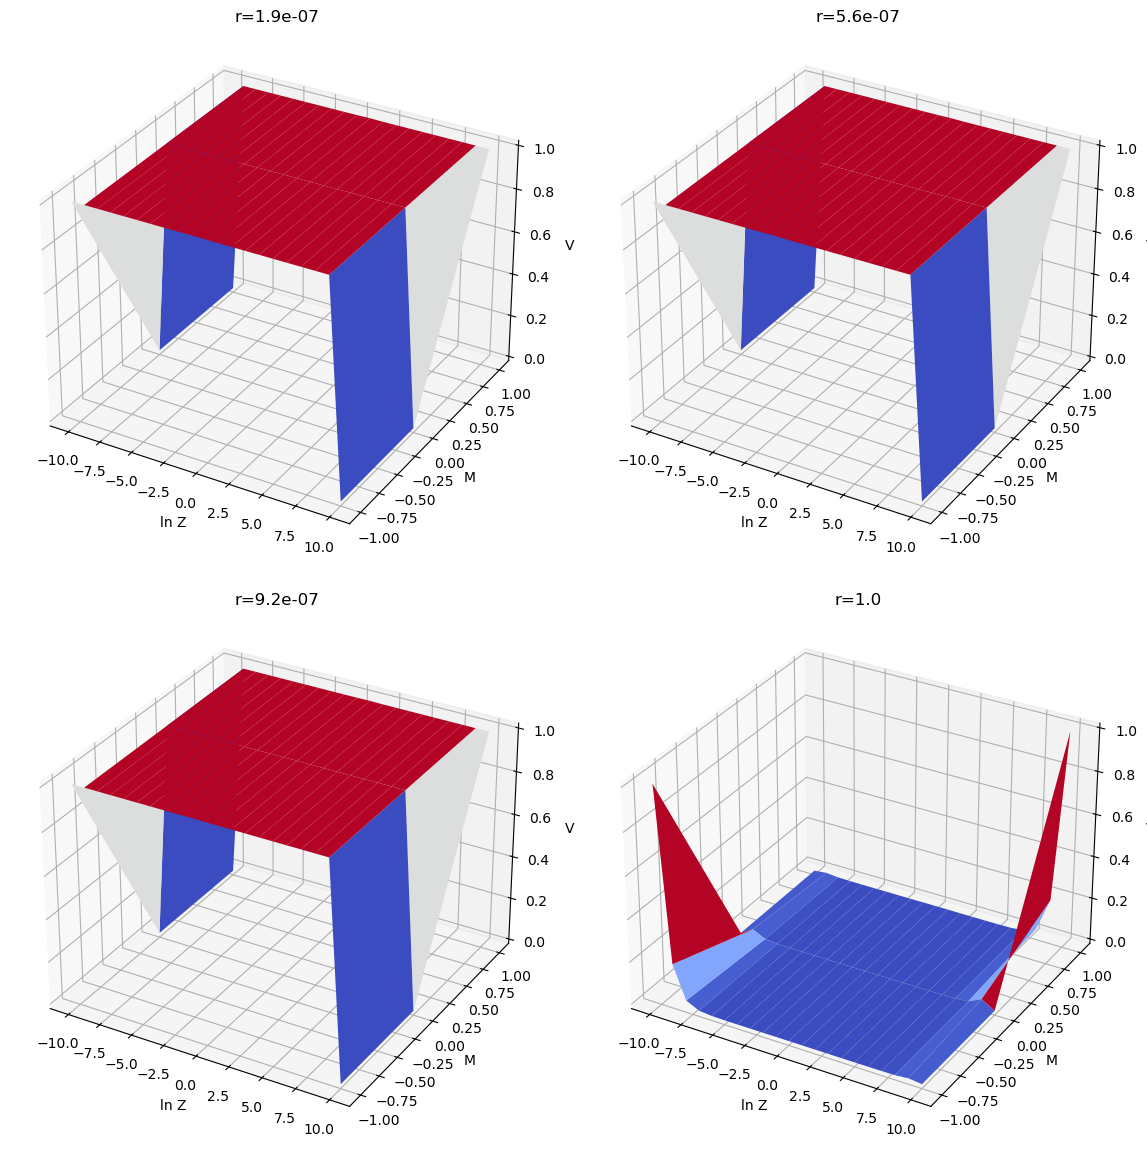

In [22]:
plot_rate_normalized_3D(k=1, ln_Pa=-1, ln_Pb=1, ln_Pl=-10, ln_Pu=10, L=1, gamma=0.997, p=0.5)

In [ ]:
config.DISABLE_JIT = True
%timeit -r 3 -c plot_rate_normalized_3D(k=100, ln_Pa=-17, ln_Pb=16, ln_Pl=-17, ln_Pu=16, L=1, gamma=0.997, p=0.5)

In [ ]:
config.DISABLE_JIT = False
%timeit -r 3 -c plot_rate_normalized_3D(k=100, ln_Pa=-17, ln_Pb=16, ln_Pl=-17, ln_Pu=16, L=1, gamma=0.997, p=0.5)

### Plot the results(all states, 2D heat map)

In [23]:
import seaborn as sns

In [126]:
def df_mp(k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, r,gamma, p,normalized=True):
    # different interest rates for each subplot
    N = ln_Pu - ln_Pl - 1
    V_array = V_enum(k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, r, p)
    price_boundary=np.arange(ln_Pl, ln_Pu + 1)[::-1]
    M_range = np.arange(-k, k + 1)
    V_df = pd.DataFrame(columns=M_range, index=price_boundary)
    # must need this line otherwise "Image data of dtype object cannot be converted to float" error occurs. 
    V_df = V_df.astype(float)
    for n in price_boundary:
        for m in M_range:
            # states  not inside the boundary
            if (n == ln_Pl and m > -k) or (n == ln_Pu and m < k):
                V_df.loc[n,m] = np.nan
            # states inside/on the boundary
            else:
                if normalized:
                    V_df.loc[n,m] = V_normalized(n, m, k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, r, p
                                             ,V_array)
                else:
                    V_df.loc[n,m] = V(n, m, k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, r, p
                                             ,V_array)
    return V_df

In [257]:
def plot_rate_hm(k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, p,normalized = True):
    # different interest rates for each subplot
    r_array = np.array([
        10 ** (-7),
        1e-6, 1e-5, 1e-4,
        10 ** (-3),
        1,
    ])
    N = ln_Pu - ln_Pl - 1
    fig,ax = plt.subplots(2,3,figsize=(10, 10))
    for i,r in enumerate(r_array):
        # position of subplots in the 3by3 square
        j_1 = int(i / 3)
        j_2 = i % 3
        price_boundary = np.arange(ln_Pl, ln_Pu + 1)
        M_range = np.arange(-k, k + 1)
        V_df = df_mp(k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, r,gamma, p,normalized)
        sns.heatmap(V_df, ax=ax[j_1, j_2],cmap='coolwarm',cbar=True,linewidth=0.01,linecolor='k')
        ax[j_1, j_2].set_title(f"r= {r}", pad=0)
        ax[j_1, j_2].set_xlabel("M ", fontdict={"size": 10})
        ax[j_1, j_2].set_ylabel("ln Z", fontdict={"size": 10})
    plt.tight_layout(pad=2.5)


In [ ]:
gamma = 0.997
k = 2
p=0.5
delta = -np.log(gamma) / k
# position range
ln_Pa = -1
ln_Pb = 1
ln_Pl=-5
ln_Pu=5
L = 1

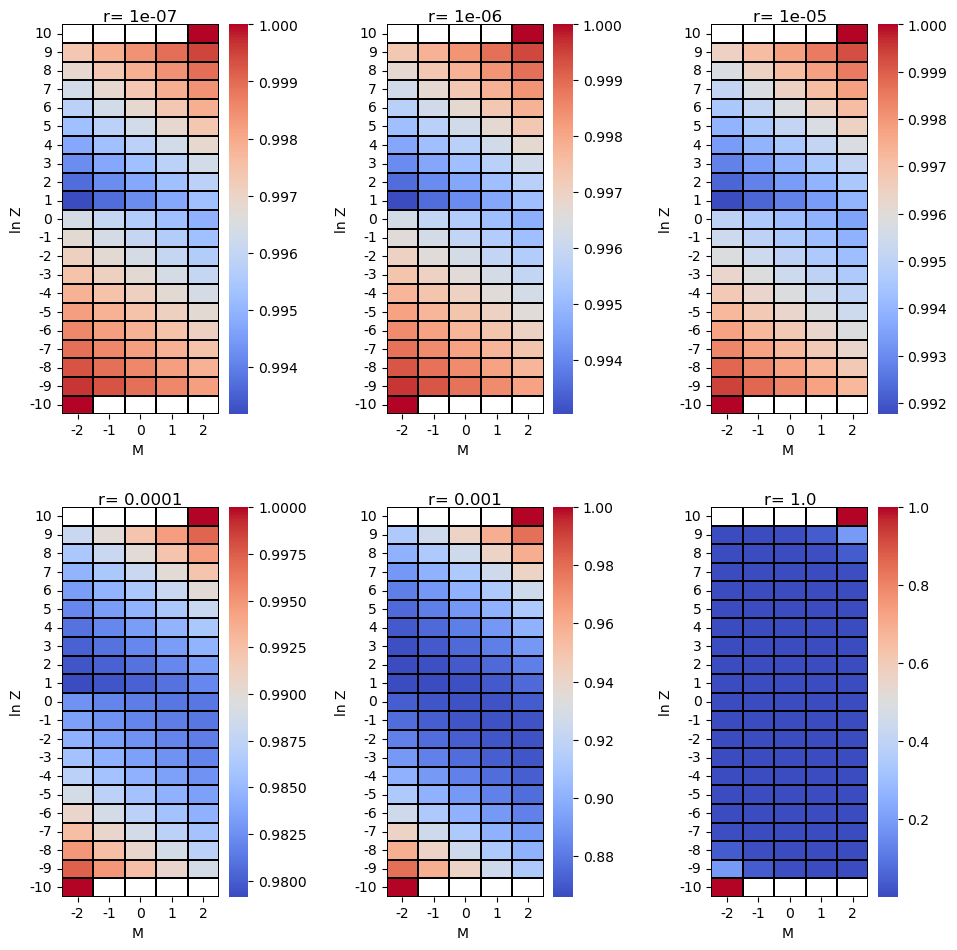

In [259]:
plot_rate_hm(k=2, ln_Pa=0, ln_Pb=1, ln_Pl=-10, ln_Pu=10, L=1, gamma=0.997, p=0.5)

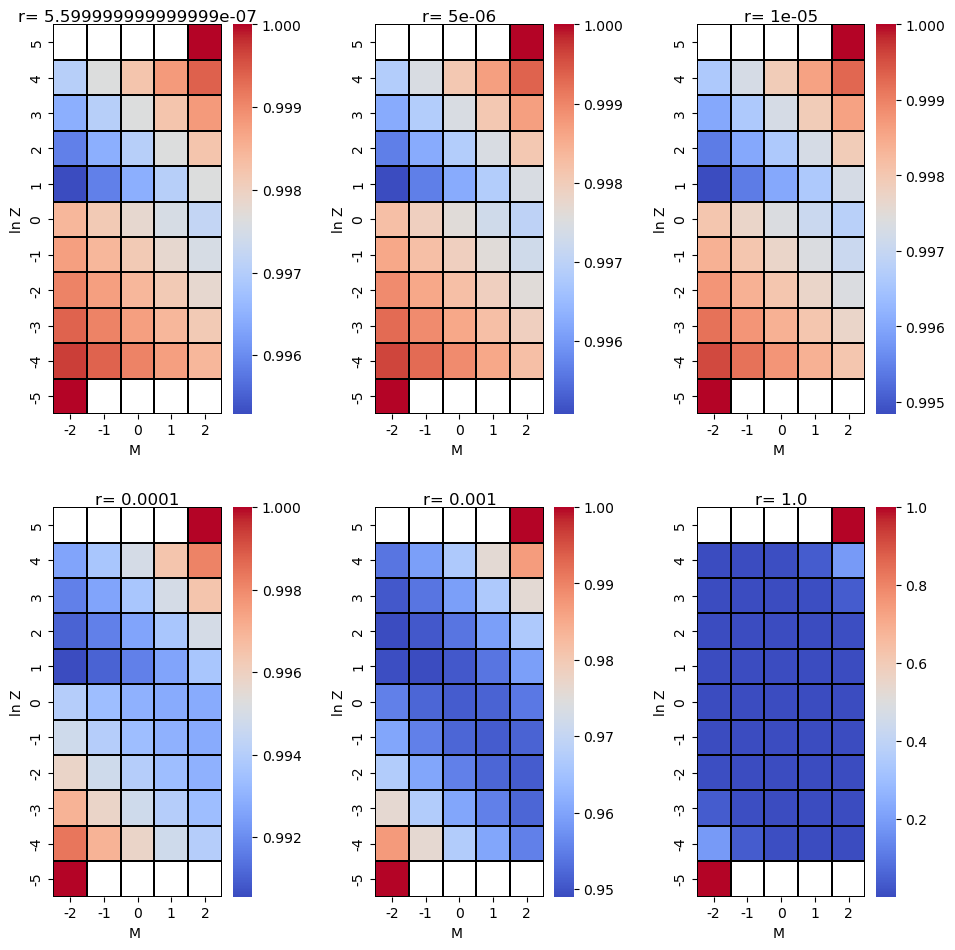

In [194]:
plot_rate_hm(k=2, ln_Pa=0, ln_Pb=1, ln_Pl=-5, ln_Pu=5, L=1, gamma=0.997, p=0.5)

### Comparison between different  boundary setting
In this part we fix the position range, liquidity $L$, 
and choose a larger $k$.
We want to know the optimal choice of price boundary $P_l$, $P_u$ 
for $V_{\text{normalized}}(n=0 ,m=0)$. In the following, set 
$\ln P_a = 0 $, $\ln P_b = \delta $, $\gamma = 0.997$, $r=5.6 \cdot 10^{-6}$ ,$k = 2$ and $L=1$. 

In [176]:
k=2
r= 5.6e-6
ln_Pa=0 
ln_Pb =1


In [221]:
def _(m,l=100):
    lower = np.arange(-l,0)
    upper = np.arange(1,l+1)
    value_df = pd.DataFrame(index= lower, columns=upper)
    for ln_Pl in lower:
        for ln_Pu in upper:
            V_array = V_enum(k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, r, p)
            V_0 = V_normalized(0, m, k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, gamma, r, p,V_array)
            value_df.loc[ln_Pl,ln_Pu] = V_0
    return value_df

In [278]:
V_array = V_enum(k, ln_Pa, ln_Pb, -15, 80, L, gamma, r, p)
V_normalized(0, 0, k, ln_Pa, ln_Pb, -15, 80, L, gamma, r, p,V_array)

0.9969197526232562

In [279]:
V_array = V_enum(k, ln_Pa, ln_Pb, -14, 80, L, gamma, r, p)
V_normalized(0, 0, k, ln_Pa, ln_Pb, -14, 80, L, gamma, r, p,V_array)

0.9730812731664974

Text(50.722222222222214, 0.5, 'ln_Pl')

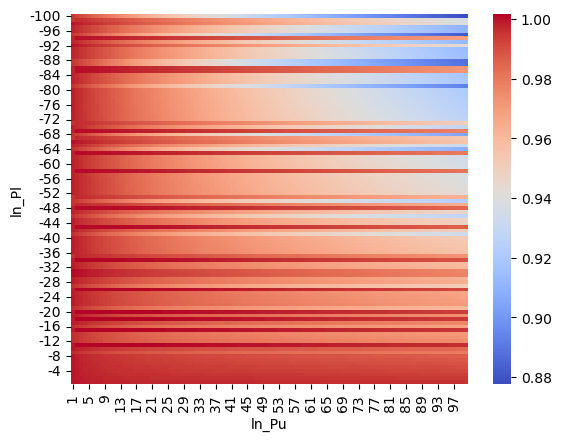

In [222]:
V_df=_(0,l=100).astype(float)
sns.heatmap(V_df ,cmap='coolwarm',cbar=True,linewidth=1e-4,linecolor='k')
plt.xlabel('ln_Pu')
plt.ylabel('ln_Pl')

In [225]:
idx = np.argmax(V_df.values)
ln_Pl,ln_Pu = V_df.stack().index[idx]

In [260]:
ln_Pl,ln_Pu 

(-18, 10)

In [232]:
V_df.loc[ln_Pl,ln_Pu]

1.001574840177328

Text(50.722222222222214, 0.5, 'ln Z')

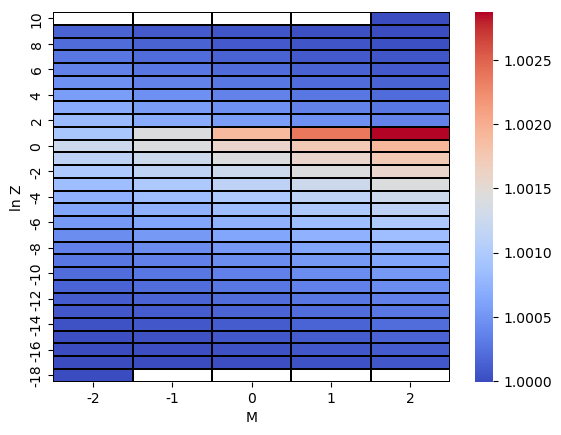

In [237]:
price_boundary = np.arange(ln_Pl, ln_Pu + 1)
M_range = np.arange(-k, k + 1)
V_df = df_mp(k, ln_Pa, ln_Pb, ln_Pl, ln_Pu, L, r,gamma, p)
sns.heatmap(V_df,cmap='coolwarm',cbar=True,linewidth=0.01,linecolor='k')
plt.xlabel('M')
plt.ylabel('ln Z')

In [248]:
parameter = pd.DataFrame( 
{'k':[k], 'ln P_a':[ln_Pa], 'ln P_b':[ln_Pb], 'ln P_l':[ln_Pl], 'ln P_u':[ln_Pu], 'L':[L], 'r':[r],'gamma':[gamma], 
 'p':[p]}
)

In [254]:
parameter

,k,ln P_a,ln P_b,ln P_l,ln P_u,L,r,gamma,p
0,2,0,1,-18,10,1,0.000006,0.997,0.5


In [265]:
-np.log(gamma)/1.58

0.001901587987530838